In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import os.path

In [3]:
if not os.path.isfile('lab_helper.py'):
    ! wget https://github.com/lab-ml-itba/Laboratorio-01/raw/master/lab_helper.py

--2021-05-28 17:04:34--  https://github.com/lab-ml-itba/Laboratorio-01/raw/master/lab_helper.py
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/lab-ml-itba/Laboratorio-01/master/lab_helper.py [following]
--2021-05-28 17:04:34--  https://raw.githubusercontent.com/lab-ml-itba/Laboratorio-01/master/lab_helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10609 (10K) [text/plain]
Saving to: ‘lab_helper.py’

lab_helper.py       100%[===================>]  10.36K  --.-KB/s    in 0s      

2021-05-28 17:04:34 (90.2 MB/s) - ‘lab_helper.py’ saved [10609/10609]



In [4]:
from lab_helper import plot_boundaries, get_polynimial_set, plot_gaussians

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
def generate_elipse_data(N=500, random_state=42):
    np.random.seed(random_state)
    X = 2*(np.random.rand(N, 2)-0.5)
    y = 1*(2*(X[:,0]**2 + 2*X[:,1]**2 - 2*X[:,1]*X[:,0])<0.8)
    return X, y

def generate_gaussians_distributions(N=500, random_state=42):
    np.random.seed(random_state)
    X1 = np.random.multivariate_normal([0.5, 0.5], [[0.1,-0.085],[-0.085,0.1]], N//2)
    X2 = np.random.multivariate_normal([-0.25, -0.25], [[0.1,0],[0,0.1]], N//2)
    X = np.append(X1, X2, axis=0)
    y = np.append(np.zeros(N//2), np.ones(N//2))
    return X, y

# Selección del dataset

In [69]:
X, y = generate_gaussians_distributions()
#X, y = generate_elipse_data()

In [24]:
sum(y)
print(1-159/500)

0.6819999999999999


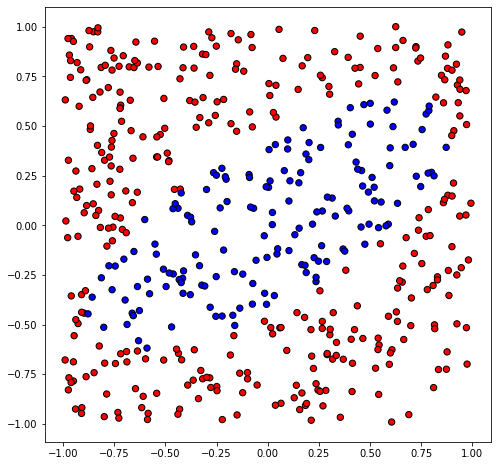

In [7]:
plt.figure(figsize=(8,8))
plot_boundaries(X,y)

In [8]:
model = LogisticRegression(solver='lbfgs')

In [9]:
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

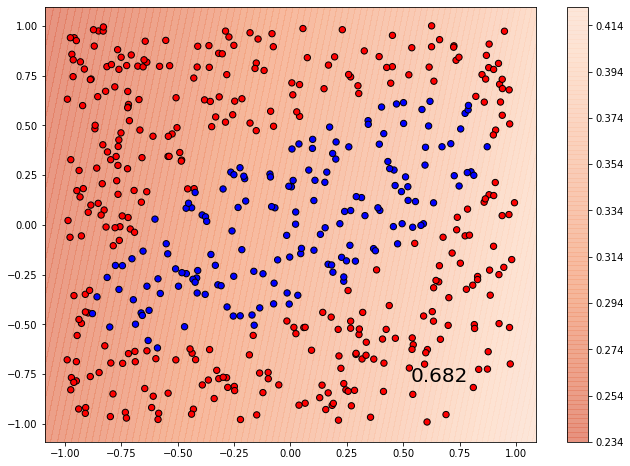

In [10]:
score = model.score(X,y)
plt.figure(figsize=(11,8))
plot_boundaries(X,y, score, probability_func=model.predict_proba, mesh_res=500)

In [11]:
model.predict_proba(np.array([0.5, -0.75]).reshape(1, 2))

array([[0.63053289, 0.36946711]])

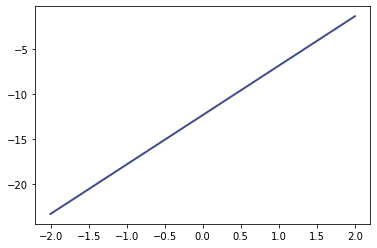

In [12]:
x1 = np.linspace(-2, 2, 100)
x2 = -(model.coef_[0][0] * x1 + model.intercept_[0]) / model.coef_[0][1]
plt.plot(x1, x2, color='#414e8a', linewidth=2)

In [13]:
print(-model.coef_[0][0]/model.coef_[0][1])
print(-(model.intercept_[0] / model.coef_[0][1]))

5.490351218862914
-12.2897792569761


In [14]:
from sklearn.metrics import log_loss
y_proba=model.predict_proba(X)
log_loss(y, y_proba)

0.6208125613102843

AttributeError: ignored

# Regresión polinomial

In [16]:
print('La dimensión de las observaciones',X.shape, 'Tiene que quedar en (500, 6)')

La dimensión de las observaciones (500, 2) Tiene que quedar en (500, 6)


In [60]:
# Completar la función 
def add_columns(X):
    # Se agrega primer columna elevada al cuadrada como 3er columna
    X = np.append(X, (X[:,0]**2).reshape(-1,1), axis=1)
    # TODO: Agregar producto de primer columna por segunda columna en la cuarta columna
    X = np.append(X, X[:,1].reshape(-1,1)*X[:,0].reshape(-1,1), axis=1) # Agregar aca no olvidar el reshape reshape(-1,1)
    # TODO: Agregar segunda columna elevada al cuadrada como 5er columna
    X = np.append(X,(X[:,1]**2).reshape(-1,1), axis=1) # Agregar aca no olvidar el reshape reshape(-1,1)
    # Se agrega la columna de 1s como 6ta columna para despues usar fit_intercept=False. Es necesario para la librería de graficación
    X = np.append(np.ones((len(X), 1)), X, axis=1)
    return X

In [61]:
import pandas as pd
X2=add_columns(X)
DF=pd.DataFrame(X2)
print(DF.head())

     0         1         2         3         4         5
0  1.0 -0.250920  0.901429  0.062961 -0.226186  0.812574
1  1.0  0.463988  0.197317  0.215285  0.091553  0.038934
2  1.0 -0.687963 -0.688011  0.473293  0.473326  0.473359
3  1.0 -0.883833  0.732352  0.781160 -0.647277  0.536340
4  1.0  0.202230  0.416145  0.040897  0.084157  0.173177


In [62]:
add_columns(X).shape

(500, 6)

In [63]:
model_poly = LogisticRegression(solver='lbfgs', fit_intercept=False)

In [64]:
model_poly.fit(add_columns(X), y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

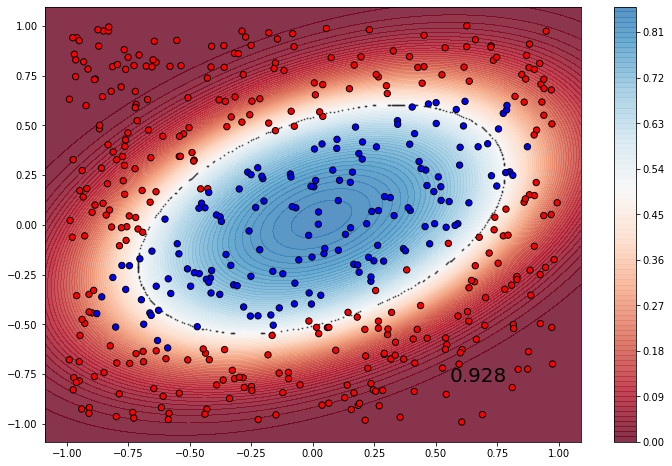

In [65]:
plt.figure(figsize=(12,8))
score = model_poly.score(add_columns(X), y)
plot_boundaries(X,y, score, probability_func=model_poly.predict_proba, mesh_res=500, degree=2)

# Regularización

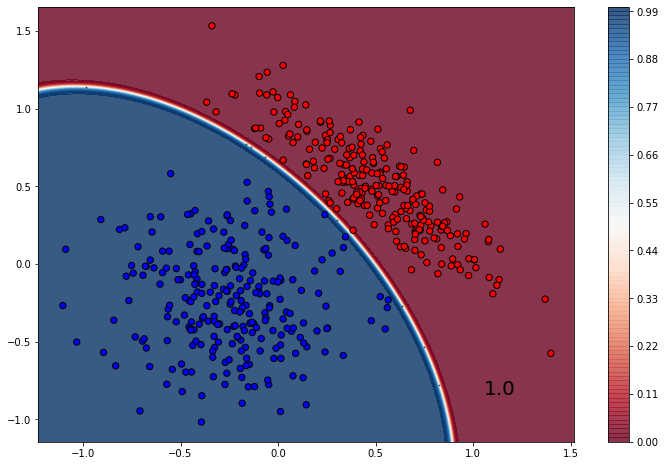

In [70]:
C = 100001 # Modifique el valos de C
model_poly = LogisticRegression(solver='lbfgs', fit_intercept=False, C=C)
model_poly.fit(add_columns(X), y)
plt.figure(figsize=(12,8))
score = model_poly.score(add_columns(X), y)
plot_boundaries(X,y, score, probability_func=model_poly.predict_proba, mesh_res=500, degree=2)